In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import stephane.Image_processing.tiff as tiff
import scipy.misc as misc
import matplotlib.pyplot as plt
import PIL.Image as Image
import scipy.ndimage.measurements as meas
import glob
import numpy as np
import stephane.tools.rw_data as rw_data
import stephane.tools.browse as browse
import stephane.display.graphes as graphes
import stephane.display.panel as panel
import stephane.manager.access as access
import stephane.elasticity.processing as proc
import stephane.elasticity.balloon as ball
import scipy

In [28]:
ball.pressure(0.006,2*np.pi,20,R0=19)
fx = 0.1 #mm/pix

In [3]:
folder = '/Users/stephane/Documents/Postdoc_Princeton/Balloon/Crack_opening/20170808_fps20k/'
D_0 = proc.load(folder,step=1)

In [62]:
x0,y0 = (475,234)
x1,y1 = (777,638)

((1000,), (1000,))


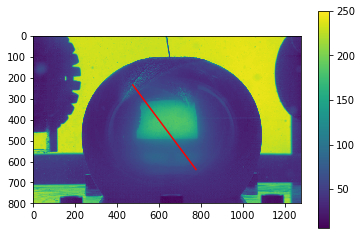

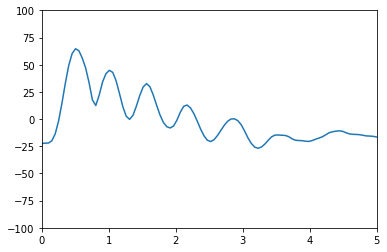

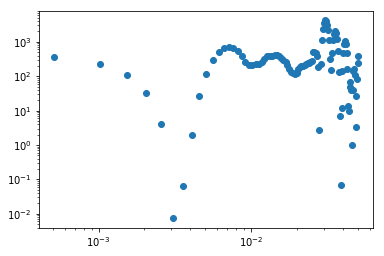

In [75]:
i=20
plt.imshow(np.transpose(D_0['im'][i,:,:]))
plt.colorbar()
#plt.plot([x0,x1],[y0,y1],'r')
nt,ny,nx = D_0['im'].shape
x=np.arange(nx)
y=np.arange(ny)
X,Y = np.meshgrid(x,y)
f = scipy.interpolate.interp2d(x,y,D_0['im'][i,...], kind='cubic')

N=1000.
xL = np.linspace(x0,x1,N)
yL = np.linspace(y0,y1,N)
print(xL.shape,yL.shape)
plt.plot(xL,yL,'r')
I = np.asarray([f(j,i) for (i,j) in zip(xL,yL)])
L = np.sqrt((xL-x0)**2+(yL-y0)**2)*fx

Lmin = 0.5
Lmax = 5
I0 = I[L<Lmax]
plt.figure(2)
plt.plot(L[L<Lmax],I0-np.mean(I0))
plt.axis([0,Lmax,-100,100])

plt.figure(3)
n = len(L[L<Lmax])
kmax = max(L)/N
k = np.linspace(0,kmax,n)
plt.loglog(k,np.abs(np.fft.fftshift(np.fft.fft((I0-np.mean(I0))**2))),'o')
#plt.axis([0,5,0,200])
#print(I0)

In [37]:
I[L<5]

TypeError: only integer arrays with one element can be converted to an index

In [15]:
#estimate of the shear
U_0 = 30 #in m/s
t0 = 10**-3 # shear time in s
nu = 10**-6
delta = np.sqrt(nu*t0)
eta = U_0/(np.sqrt(np.pi)*delta)
print(eta)
print(delta)

535237.234846
3.16227766017e-05
